<a href="https://colab.research.google.com/github/SujitbMusale/Mobile-Price-Range-Prediction-classification/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost).

# Importing data and data cleaning

In [1]:
# importing the required libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# importing csv file.
Mob_data=pd.read_csv("/content/drive/MyDrive/almabetter/capston project/Supervised Machine Learning - Classification/data_mobile_price_range.csv")

In [4]:
Mob_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# check data shape
Mob_data.shape

(2000, 21)

In [6]:
# lets check null value and variable type
Mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Whole data present in numeric varaible and also there is no any null value is the given data.

In [7]:
# lets chcek Data statics.
Mob_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Here we can see that sc_w and px_height has minimum value 0. it is not possible that mobile with 0 screen width and pixcel with 0 height.

In [8]:
# lets check the  count of zero value present in the both of this variable.
print(Mob_data[Mob_data['px_height']==0].shape[0])
print(Mob_data[Mob_data['sc_w']==0].shape[0])

2
180


So, px_height and sc_w are having 2 and 180 numbers of zero value respectively.
as px_height is just having 2 values as zero we can drop that rows easily.
and for sc_w we use Nearest Neighbour Imputations as Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

In [9]:
# Dropping px_height
Mob_data=Mob_data[Mob_data['px_height']!=0]

In [10]:
# Lets replace 0 with NaN value to use KNN Imputer
Mob_data['sc_w']=Mob_data['sc_w'].replace(0,np.nan)

In [11]:
# use KNN Imputer by importing from sklearn
from sklearn.impute import KNNImputer
Mob_data=pd.DataFrame(KNNImputer(n_neighbors=1).fit_transform(Mob_data),columns=Mob_data.columns)

In [12]:
Mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1998 non-null   float64
 1   blue           1998 non-null   float64
 2   clock_speed    1998 non-null   float64
 3   dual_sim       1998 non-null   float64
 4   fc             1998 non-null   float64
 5   four_g         1998 non-null   float64
 6   int_memory     1998 non-null   float64
 7   m_dep          1998 non-null   float64
 8   mobile_wt      1998 non-null   float64
 9   n_cores        1998 non-null   float64
 10  pc             1998 non-null   float64
 11  px_height      1998 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1998 non-null   float64
 15  sc_w           1998 non-null   float64
 16  talk_time      1998 non-null   float64
 17  three_g        1998 non-null   float64
 18  touch_sc

In [13]:
# check for duplicate value
Mob_data.duplicated().sum()

0

AS there is no duplicate value and also no any null value so we are all set to perfom EDA.

#EDA

In [14]:
# lets check the target variable counts.
print(Mob_data['price_range'].value_counts())

2.0    500
0.0    500
1.0    499
3.0    499
Name: price_range, dtype: int64


In [15]:
Mob_data['price_range'].value_counts()

500

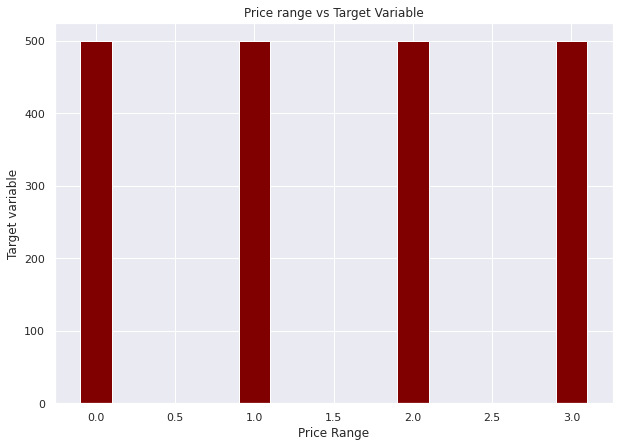

In [27]:
fig = plt.figure(figsize =(10, 7))
plt.bar( Mob_data['price_range'],color ='maroon',width = 0.2,height=500)
plt.xlabel("Price Range")
plt.ylabel("Target variable")
plt.title("Price range vs Target Variable")
plt.show()

Here we can see that there is no Inbalanced in target variable.. as all values counts are almost equal

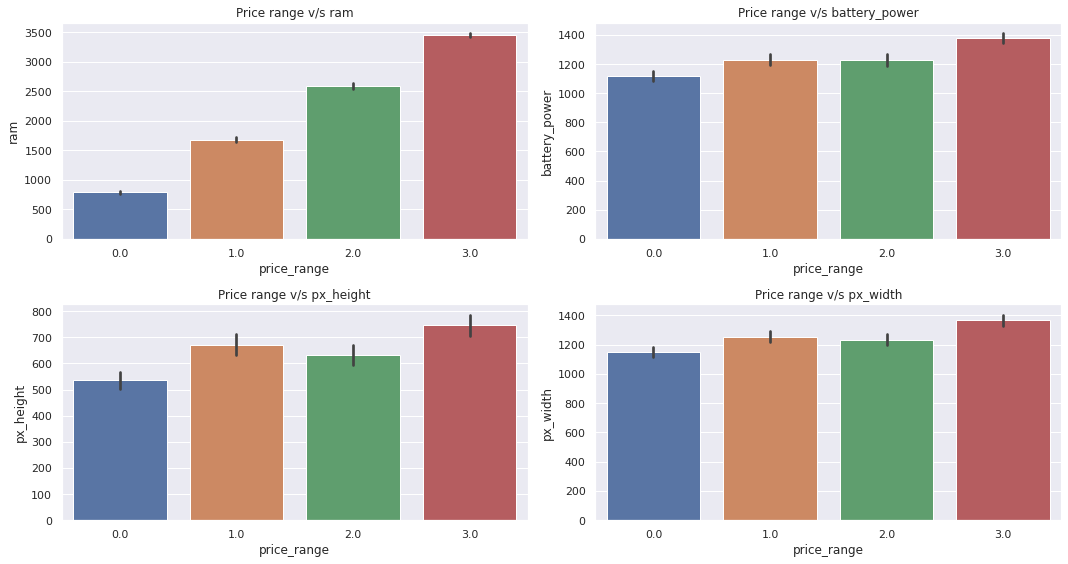

In [38]:
# plotting  price_range vs other fearures
plt.figure(figsize=(15,8))
x=1
variables=['ram','battery_power','px_height','px_width']
for var in variables:
  plt.subplot(2,2,x)
  sns.barplot(x=Mob_data['price_range'],y=Mob_data[var])
  plt.title(f'Price range v/s {var}')
  x=x+1
  plt.tight_layout()

* we can see that from 1st graph that as Ram incereaes price also increase 
so we can say that they are having positive corellation is exist between two variable.
* Also In 2nd graph battary power and price having positive relation between them.
* for Pixal height and pixel width also having positive relation but for price range 1 and 2 you can see pxal height and pixel width are not having any significant impact on mobile price.